**Installing Libraries**

In [29]:
#Installing libraries
!pip install ctgan
!pip install table_evaluator

**Loading Data**

In [2]:
#importing libraries
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dissertation/UpdatedDataset.csv')

In [4]:
data.head(10)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
5,6,"Paris, France",10/5/2023,10/10/2023,5.0,Michael Brown,42.0,Male,American,Hotel,1500,Flight,800
6,7,"Sydney, Australia",11/20/2023,11/30/2023,10.0,Emily Davis,33.0,Female,Australian,Hostel,500,Flight,1200
7,8,"Rio de Janeiro, Brazil",1/5/2024,1/12/2024,7.0,Lucas Santos,25.0,Male,Brazilian,Airbnb,900,Flight,600
8,9,"Amsterdam, Netherlands",2/14/2024,2/21/2024,7.0,Laura Janssen,31.0,Female,Dutch,Hotel,1200,Train,200
9,10,"Dubai, United Arab Emirates",3/10/2024,3/17/2024,7.0,Mohammed Ali,39.0,Male,Emirati,Resort,2500,Flight,800


**Data Preprocessing**

In [5]:
#Deleting unnecessary columns
del data["Start date"]
del data["End date"]
del data["Traveler name"]
del data["Trip ID"]


In [6]:
data.tail(50)

,Destination,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
89,Dubai,8.0,24.0,Female,Emirati,Hotel,1000 USD,Plane,800 USD
90,Bangkok,7.0,26.0,Male,Vietnamese,Airbnb,400 USD,Train,100 USD
91,Rome,11.0,30.0,Female,Italian,Hostel,200 USD,Plane,350 USD
92,Bali,11.0,33.0,Male,Indonesian,Villa,1500 USD,Car rental,300 USD
93,Seoul,10.0,27.0,Female,Korean,Hotel,800 USD,Train,150 USD
94,Paris,5.0,35.0,Male,USA,Hotel,$500,Plane,$800
95,Tokyo,9.0,28.0,Female,Canada,Airbnb,$400,Train,$200
96,Sydney,9.0,45.0,Male,South Korea,Hostel,$200,Plane,"$1,200"
97,London,5.0,37.0,Female,UK,Hotel,$600,Plane,$700
98,New York,6.0,50.0,Male,China,Airbnb,$800,Car rental,$300


In [7]:
#Removing spaces from column names

data.columns = data.columns.str.replace(' ', '')

In [8]:
#Removing special characters from the b

data['Transportationcost'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
data['Accommodationcost'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')


In [9]:
data.tail(50)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Accommodationcost,Transportationtype,Transportationcost
89,Dubai,8.0,24.0,Female,Emirati,Hotel,1000,Plane,800
90,Bangkok,7.0,26.0,Male,Vietnamese,Airbnb,400,Train,100
91,Rome,11.0,30.0,Female,Italian,Hostel,200,Plane,350
92,Bali,11.0,33.0,Male,Indonesian,Villa,1500,Car rental,300
93,Seoul,10.0,27.0,Female,Korean,Hotel,800,Train,150
94,Paris,5.0,35.0,Male,USA,Hotel,500,Plane,800
95,Tokyo,9.0,28.0,Female,Canada,Airbnb,400,Train,200
96,Sydney,9.0,45.0,Male,South Korea,Hostel,200,Plane,1200
97,London,5.0,37.0,Female,UK,Hotel,600,Plane,700
98,New York,6.0,50.0,Male,China,Airbnb,800,Car rental,300


In [10]:
#Checking for any missing valeus
data.isna().sum()

Destination            2
Duration(days)         2
Travelerage            2
Travelergender         2
Travelernationality    2
Accommodationtype      2
Accommodationcost      2
Transportationtype     3
Transportationcost     3
dtype: int64

In [11]:
def nans(df): return data[data.isnull().any(axis=1)]


In [12]:
nans(data)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Accommodationcost,Transportationtype,Transportationcost
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,"Rome, Italy",7.0,41.0,Male,American,Hotel,100,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = data.dropna()

In [14]:
#Checking for any missing valeus
data.isna().sum()

Destination            0
Duration(days)         0
Travelerage            0
Travelergender         0
Travelernationality    0
Accommodationtype      0
Accommodationcost      0
Transportationtype     0
Transportationcost     0
dtype: int64

In [15]:
data.dtypes

Destination             object
Duration(days)         float64
Travelerage            float64
Travelergender          object
Travelernationality     object
Accommodationtype       object
Accommodationcost       object
Transportationtype      object
Transportationcost      object
dtype: object

In [20]:
categorical_features = ['Destination','Travelerage','Travelergender','Travelernationality','Accommodationtype','Transportationtype','Transportationcost','Accommodationcost']

In [21]:
data['Duration(days)'] = data['Duration(days)'].astype('int64')

In [22]:
data.head(10)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Accommodationcost,Transportationtype,Transportationcost
0,"London, UK",7,35.0,Male,American,Hotel,1200,Flight,600
1,"Phuket, Thailand",5,28.0,Female,Canadian,Resort,800,Flight,500
2,"Bali, Indonesia",7,45.0,Male,Korean,Villa,1000,Flight,700
3,"New York, USA",14,29.0,Female,British,Hotel,2000,Flight,1000
4,"Tokyo, Japan",7,26.0,Female,Vietnamese,Airbnb,700,Train,200
5,"Paris, France",5,42.0,Male,American,Hotel,1500,Flight,800
6,"Sydney, Australia",10,33.0,Female,Australian,Hostel,500,Flight,1200
7,"Rio de Janeiro, Brazil",7,25.0,Male,Brazilian,Airbnb,900,Flight,600
8,"Amsterdam, Netherlands",7,31.0,Female,Dutch,Hotel,1200,Train,200
9,"Dubai, United Arab Emirates",7,39.0,Male,Emirati,Resort,2500,Flight,800


In [23]:
from ctgan import CTGAN


ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


Epoch 1, Loss G:  2.8833,Loss D:  0.0105
Epoch 2, Loss G:  2.8283,Loss D: -0.0126
Epoch 3, Loss G:  2.8161,Loss D: -0.0133
Epoch 4, Loss G:  2.7651,Loss D: -0.0234
Epoch 5, Loss G:  2.8553,Loss D: -0.0126
Epoch 6, Loss G:  2.8433,Loss D: -0.0199
Epoch 7, Loss G:  2.7642,Loss D: -0.0251
Epoch 8, Loss G:  2.7350,Loss D: -0.0473
Epoch 9, Loss G:  2.9013,Loss D: -0.0412
Epoch 10, Loss G:  2.7675,Loss D: -0.0780
Epoch 11, Loss G:  2.7270,Loss D: -0.0537
Epoch 12, Loss G:  2.6630,Loss D: -0.0978
Epoch 13, Loss G:  2.7503,Loss D: -0.0833
Epoch 14, Loss G:  2.7241,Loss D: -0.1110
Epoch 15, Loss G:  2.7776,Loss D: -0.0911
Epoch 16, Loss G:  2.6689,Loss D: -0.1230
Epoch 17, Loss G:  2.7894,Loss D: -0.1487
Epoch 18, Loss G:  2.7391,Loss D: -0.1722
Epoch 19, Loss G:  2.6407,Loss D: -0.1685
Epoch 20, Loss G:  2.6724,Loss D: -0.1881
Epoch 21, Loss G:  2.6938,Loss D: -0.2302
Epoch 22, Loss G:  2.6840,Loss D: -0.2147
Epoch 23, Loss G:  2.7541,Loss D: -0.1554
Epoch 24, Loss G:  2.6540,Loss D: -0.1445
E

In [24]:
samples = ctgan.sample(15000)

In [25]:
samples.head(10)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Accommodationcost,Transportationtype,Transportationcost
0,Dubai,8,35.0,Female,Moroccan,Hotel,800,Plane,800
1,"Cancun, Mexico",7,42.0,Female,American,Hotel,1200,Train,100
2,Paris,6,27.0,Female,South Korean,Hostel,600,Train,250
3,Dubai,6,31.0,Female,Indian,Hotel,400,Plane,1200
4,"London, UK",7,27.0,Female,American,Hostel,700,Flight,200
5,Bali,7,41.0,Female,Italy,Hostel,1200,Plane,700
6,"Tokyo, Japan",8,40.0,Female,American,Airbnb,1000,Car,200
7,"Marrakech, Morocco",7,39.0,Female,Canadian,Hostel,1000,Airplane,2000
8,"Tokyo, Japan",6,25.0,Female,French,Resort,500,Car,400
9,"Bangkok, Thai",6,33.0,Female,American,Hotel,500,Train,1200


In [26]:
print(data)

                Destination  Duration(days)  Travelerage Travelergender  \
0                London, UK               7         35.0           Male   
1          Phuket, Thailand               5         28.0         Female   
2           Bali, Indonesia               7         45.0           Male   
3             New York, USA              14         29.0         Female   
4              Tokyo, Japan               7         26.0         Female   
..                      ...             ...          ...            ...   
134  Rio de Janeiro, Brazil               9         37.0           Male   
135       Vancouver, Canada               6         29.0         Female   
136       Bangkok, Thailand               7         34.0           Male   
137        Barcelona, Spain               7         25.0         Female   
138   Auckland, New Zealand               7         39.0           Male   

    Travelernationality Accommodationtype Accommodationcost  \
0              American             

In [27]:
print(categorical_features)

['Destination', 'Travelerage', 'Travelergender', 'Travelernationality', 'Accommodationtype', 'Transportationtype', 'Transportationcost', 'Accommodationcost']


(136, 9) (15000, 9)


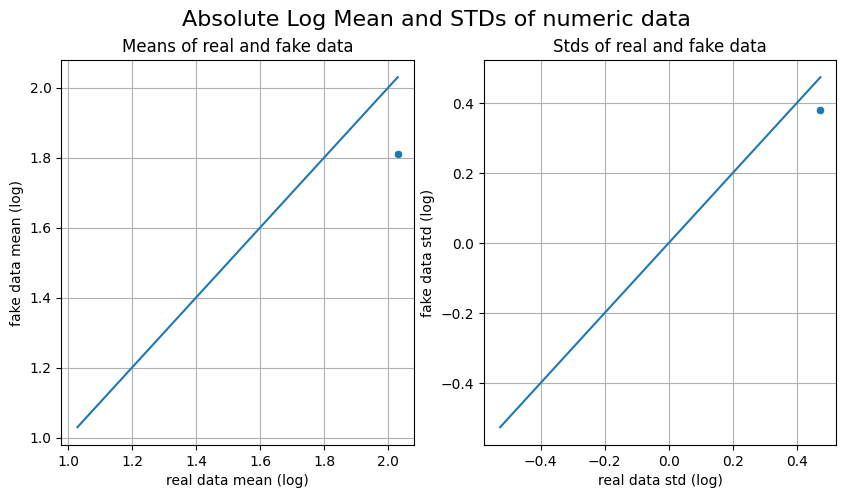

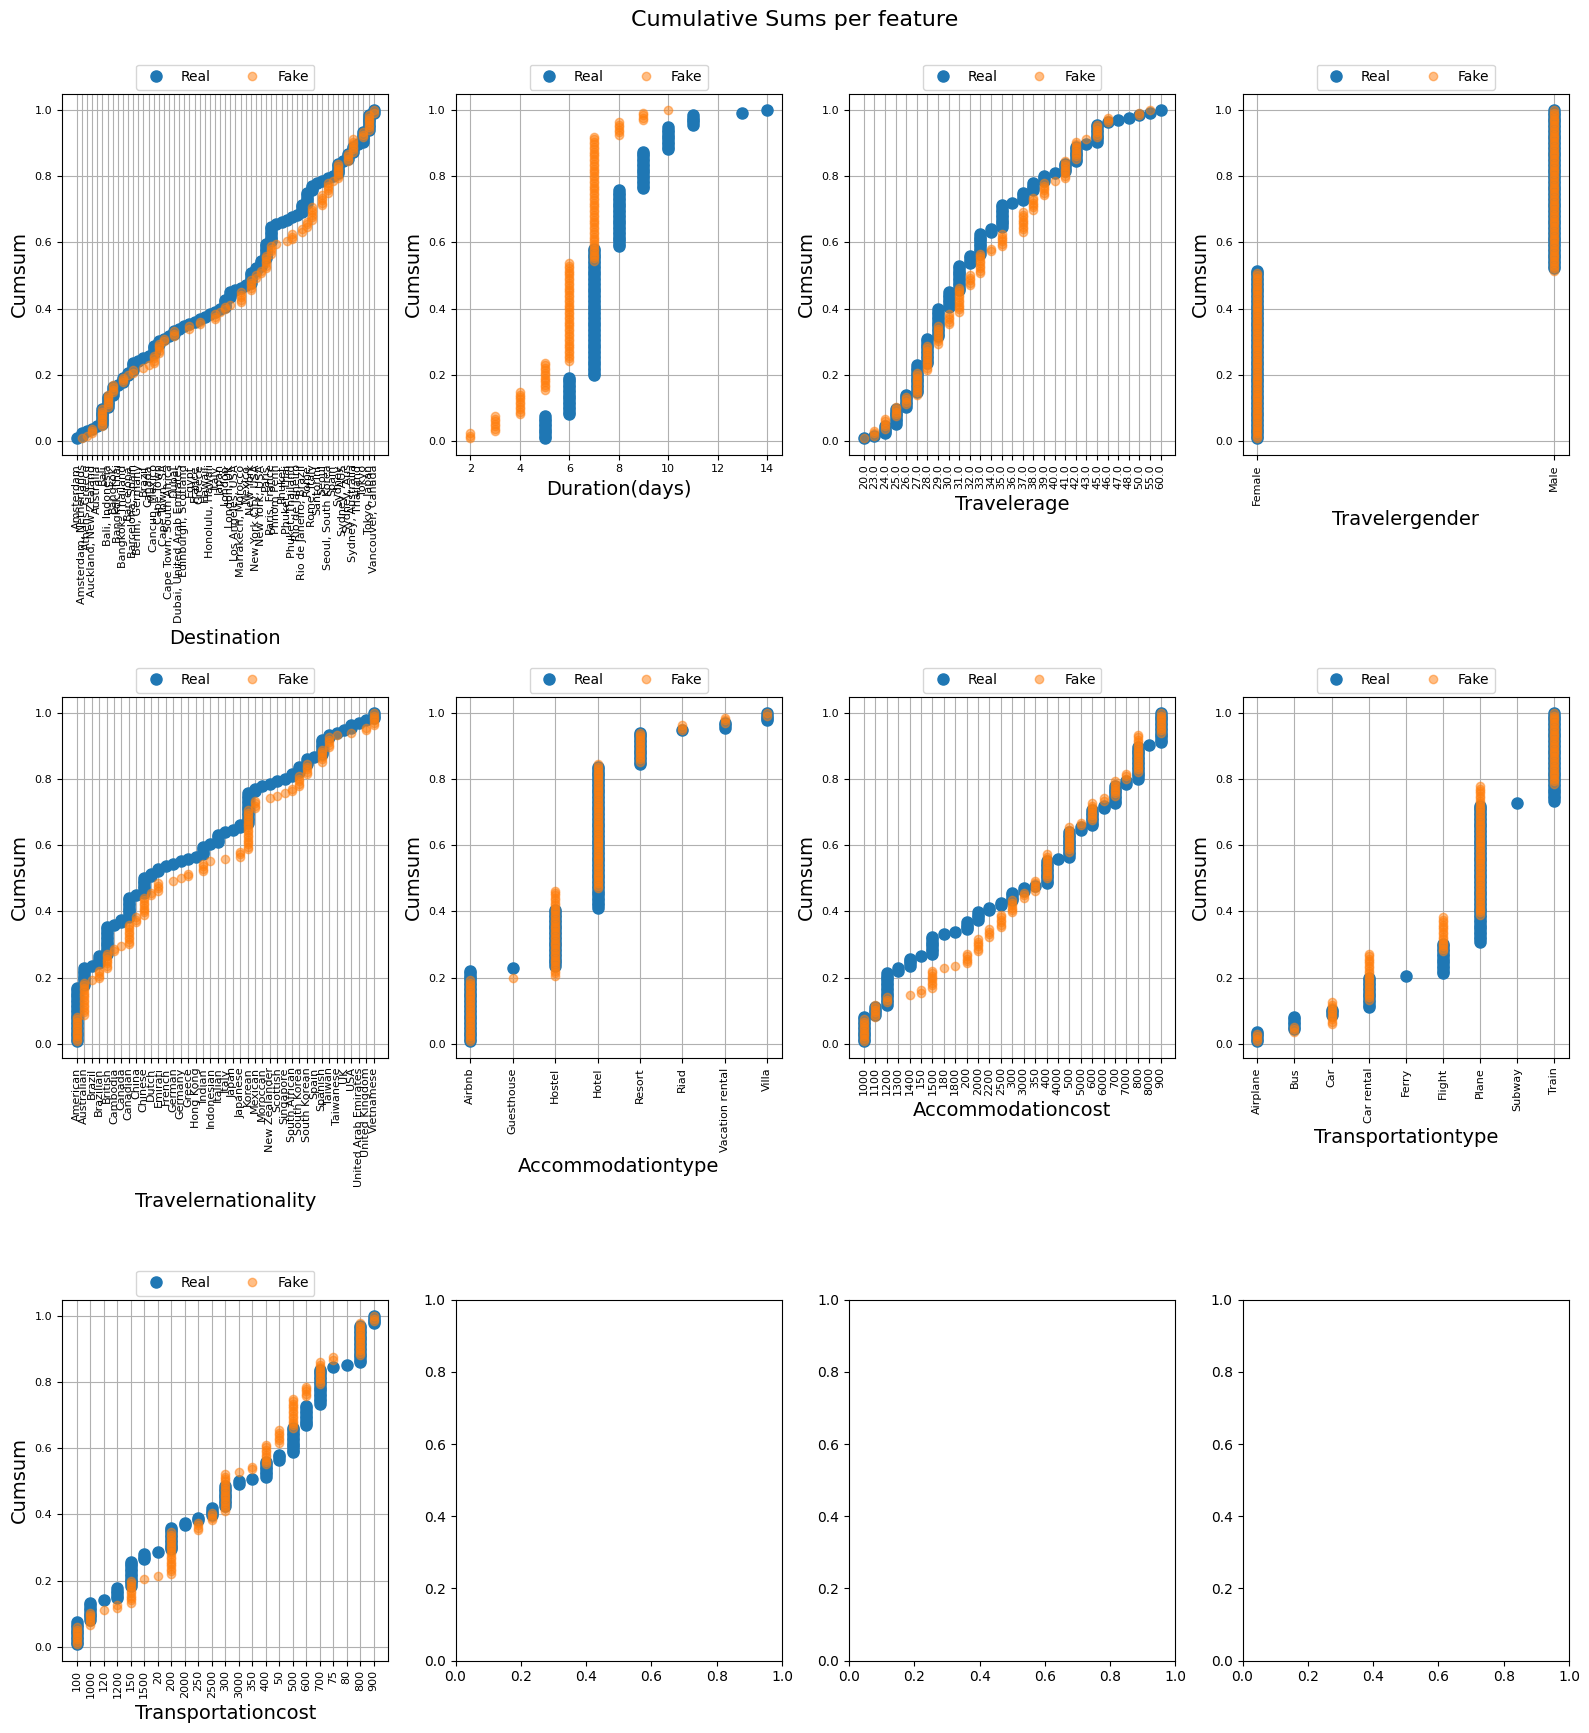

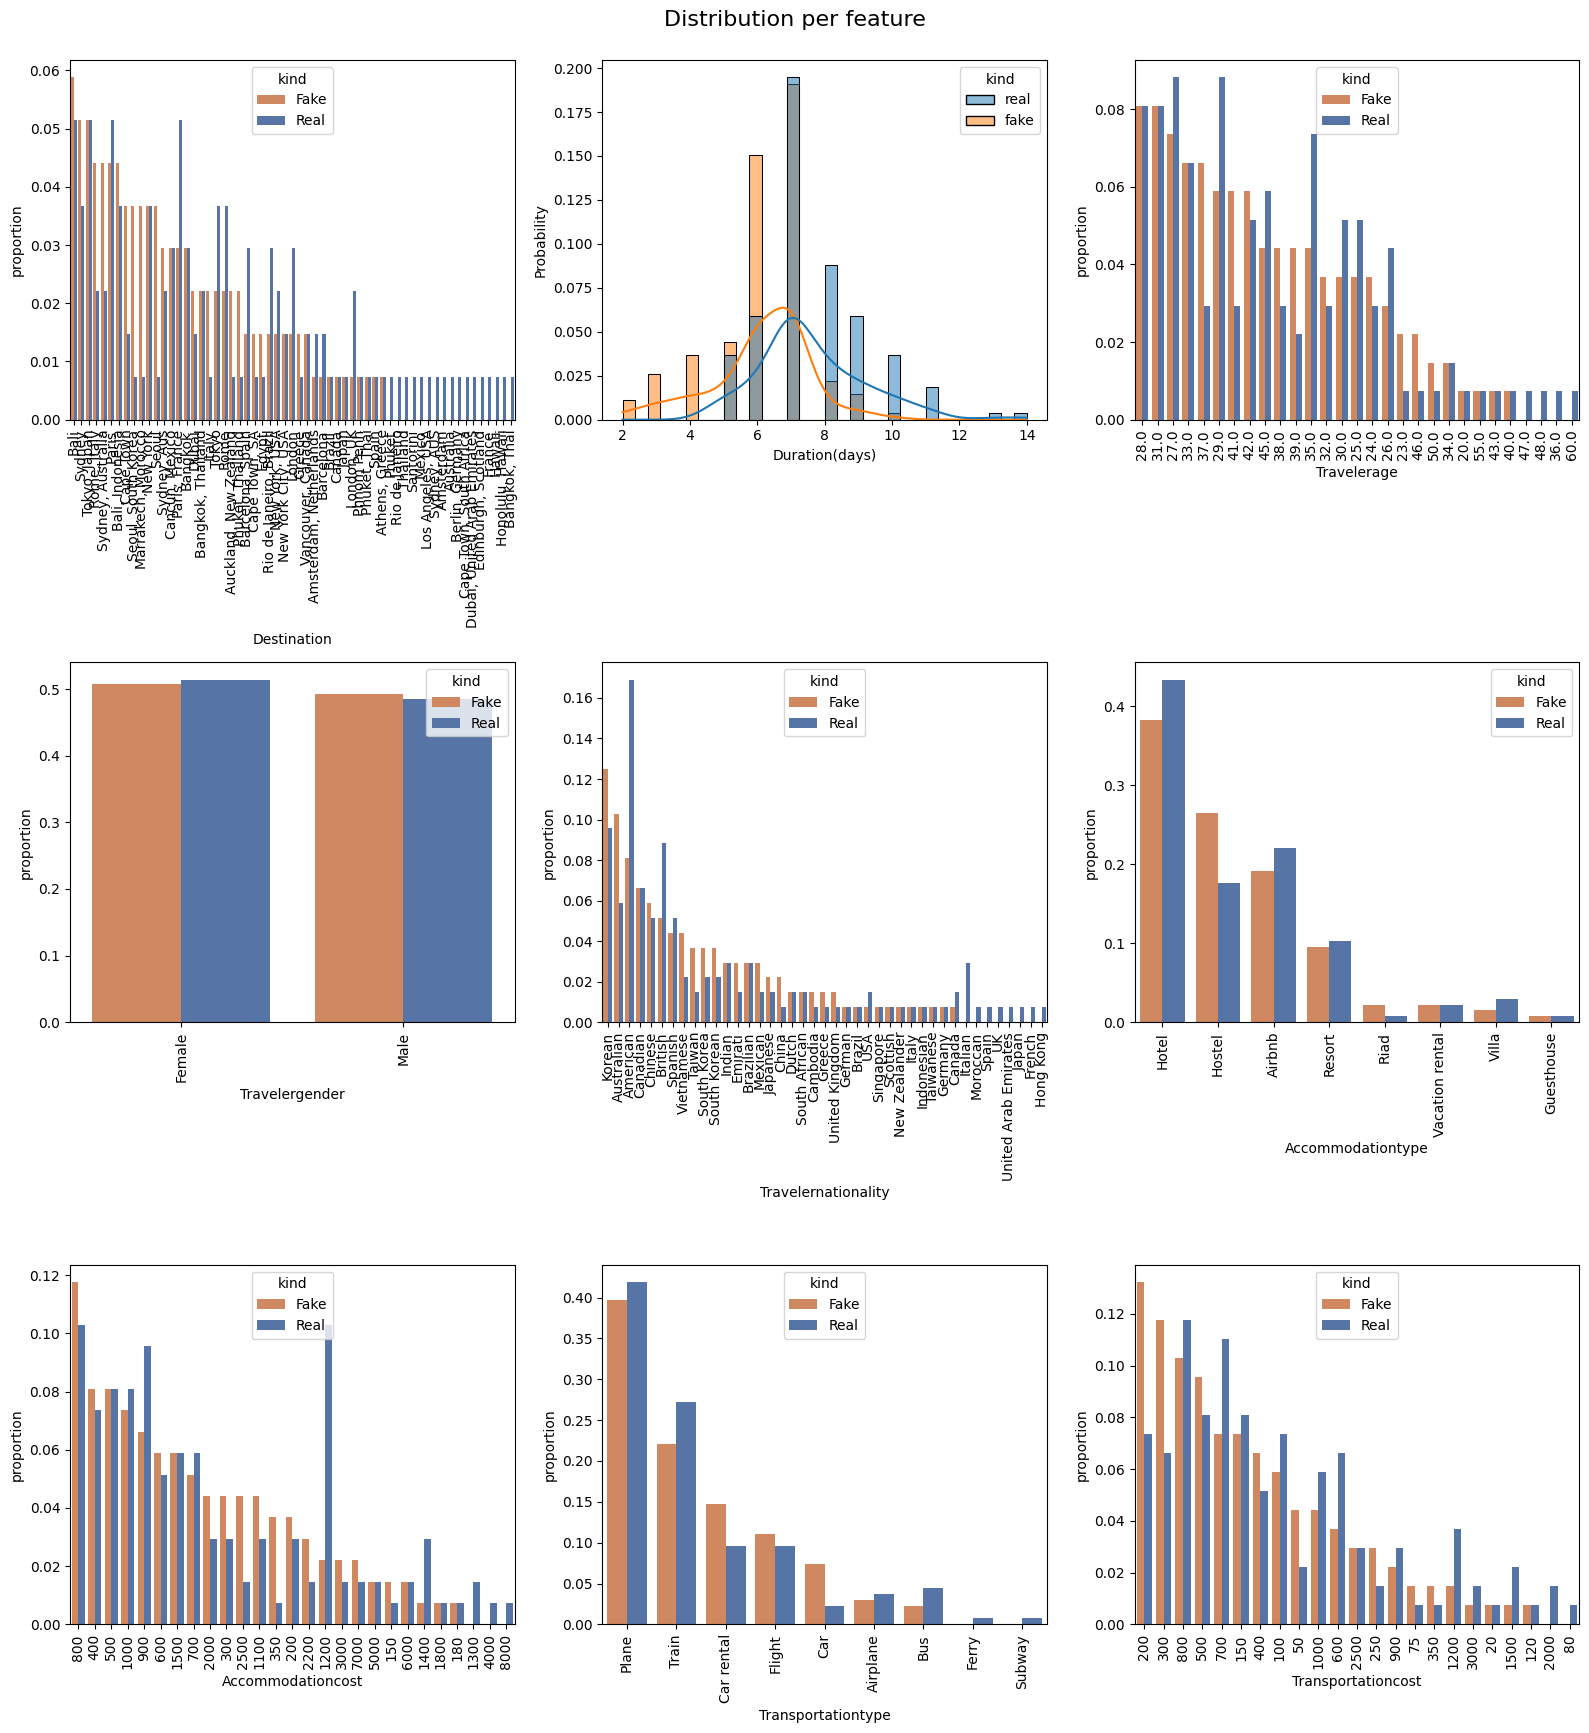

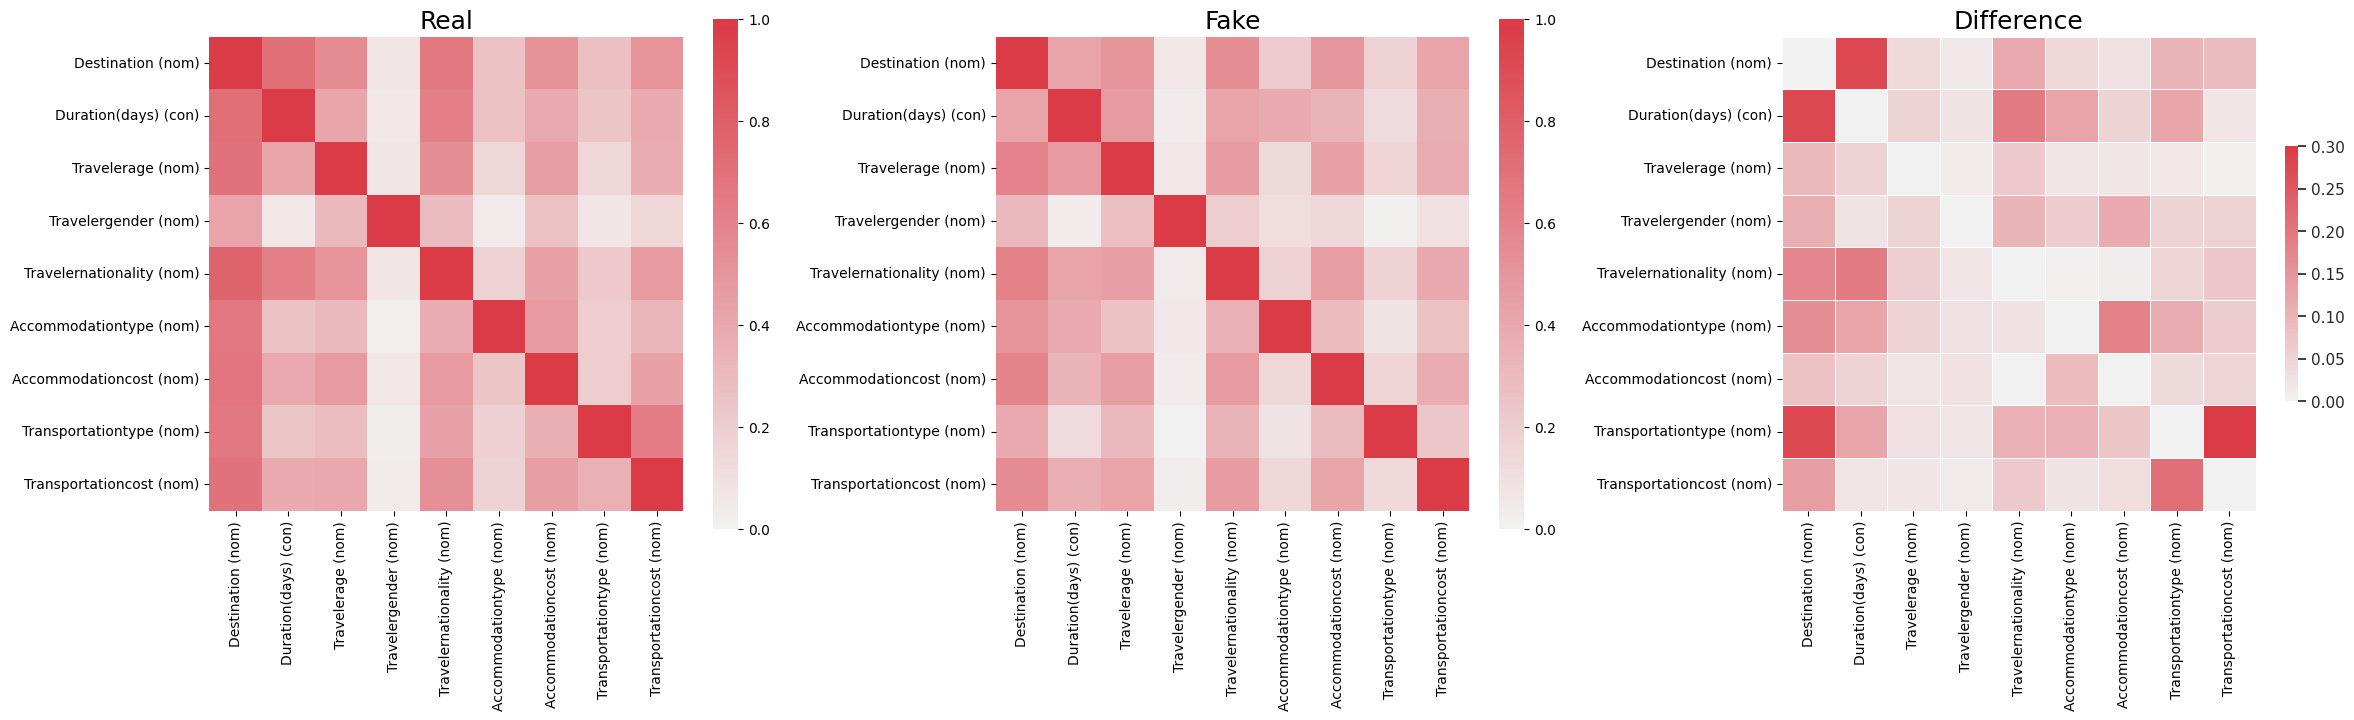

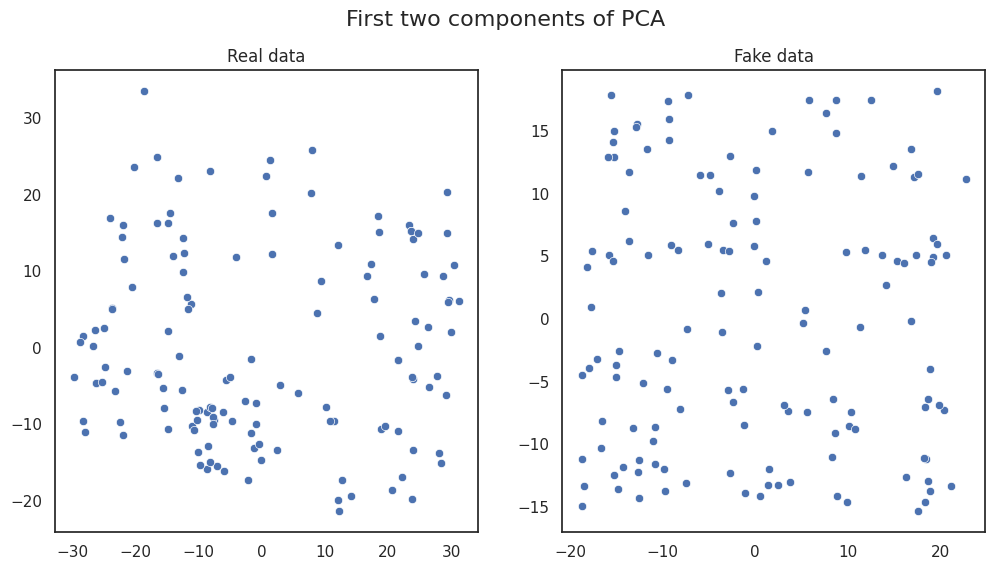

In [30]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

**Exporting dataset**

In [ ]:
final_dataset = pd.concat([data, samples], ignore_index=True)

In [ ]:
final_dataset.to_csv('synthetic_updated_data.csv', index=False)

In [ ]:
from google.colab import files

files.download('synthetic_updated_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>